In [66]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use('fivethirtyeight')

In [67]:
#xs = np.array([1,2,3,4,5,6], dtype=np.float64)
#ys = np.array([5,4,6,5,6,7], dtype=np.float64)

#plt.scatter(xs,ys)

In [68]:
def create_database(hm, variance, step=2, correlation=False):
    """this function generates the data set"""
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation =='pos':
            val += step
        elif correlation and correlation =='neg':
            val -= step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

In [69]:
def best_fit_slope_and_intercept(xs, ys):
    #formula in a image
    m = ( ((mean(xs) * mean(ys)) - mean(xs*ys)) /
           ((mean(xs)**2) - mean(xs**2)) )
    
    b = mean(ys) - m*mean(xs)
    return m, b

In [70]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)

In [71]:
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr / squared_error_y_mean)

In [72]:
xs, ys = create_database(40, 10, 2, correlation="pos")
print(xs)
print(ys)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39.]
[10. -6.  1. -2.  3.  8. 17. 18. 21. 20. 11. 24. 31. 28. 23. 39. 42. 39.
 32. 43. 48. 36. 54. 56. 43. 41. 47. 46. 64. 49. 57. 57. 66. 62. 64. 61.
 77. 80. 80. 79.]


In [73]:
m,b = best_fit_slope_and_intercept(xs, ys)
print(m, b)

1.9685741088180113 0.8378048780487788


In [74]:
regression_line = [(m*x)+b for x in xs]
print(regression_line)

[0.8378048780487788, 2.80637898686679, 4.774953095684801, 6.743527204502813, 8.712101313320824, 10.680675422138835, 12.649249530956848, 14.617823639774858, 16.58639774859287, 18.55497185741088, 20.52354596622889, 22.492120075046902, 24.460694183864916, 26.429268292682927, 28.397842401500938, 30.36641651031895, 32.33499061913696, 34.30356472795497, 36.27213883677298, 38.24071294559099, 40.209287054409, 42.177861163227014, 44.146435272045025, 46.115009380863036, 48.083583489681054, 50.052157598499065, 52.020731707317076, 53.98930581613509, 55.9578799249531, 57.92645403377111, 59.89502814258912, 61.86360225140713, 63.83217636022514, 65.80075046904315, 67.76932457786117, 69.73789868667919, 71.70647279549718, 73.6750469043152, 75.64362101313321, 77.61219512195123]


In [75]:
predict_x = 8
predict_y = m*predict_x + b

r_squared = coefficient_of_determination(ys, regression_line)
print("error:",r_squared)

error: 0.9277854301490696


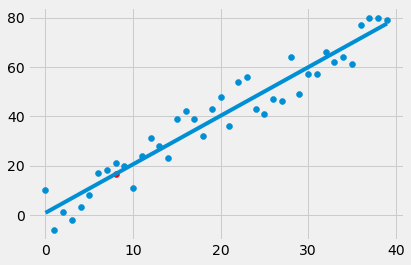

In [76]:
plt.scatter(xs,ys)
plt.plot(xs, regression_line)
#plt.scatter(xs, regression_line)

plt.scatter(predict_x,predict_y, color="r")
plt.show()